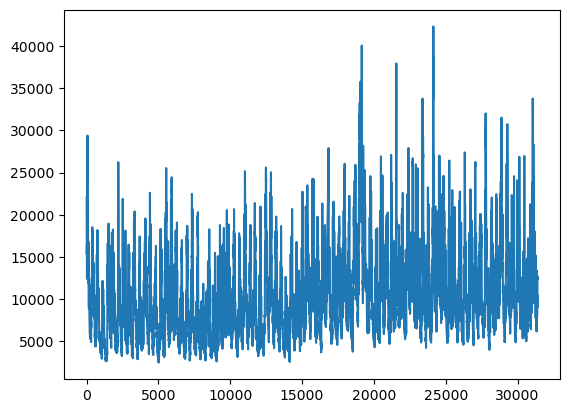

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv("apenas_leituras_15.csv", usecols=[1], engine = "python")
plt.plot(dataset)
plt.show()

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input

cols = list(range(15))

look_back = len(cols)

dataframe = pd.read_csv('apenas_leituras_15.csv', usecols=cols, engine= "python")
dataset = dataframe.values
dataset = dataset.astype("float32")


def create_dataset(dataset,look_back):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i+look_back, 0:12])
    return np.array(dataX), np.array(dataY)

train_size = int(len(dataset)*0.7)
test_size = int(len(dataset)*0.15)
validation_size = len(dataset) - (train_size+test_size)
train, test, validation = dataset[:train_size, :], dataset[train_size:train_size+test_size, :], dataset[-validation_size: , :]

trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)


model = Sequential()
model.add(Dense(units=15, input_shape=(look_back,),activation='relu'))
model.add(Dense(2))
model.add(Dense(12))

model.compile(loss="mean_squared_error", optimizer="adam")

model.fit(trainX, trainY, epochs=1, batch_size = 1, verbose = 1)

trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

plt.plot(dataset[ : , :1])
plt.plot(trainPredict[ : , :1])
plt.plot(testPredict[: , :1])
plt.show

c:\Users\eniof\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21961/21961 ━━━━━━━━━━━━━━━━━━━━ 25s 1ms/step - loss: 11142038.0000
Train Score: 7031195.00 MSE (2651.64 RMSE)
Test Score: 10659415.00 MSE (3264.88 RMSE)
687/687 ━━━━━━━━━━━━━━━━━━━━ 1s 914us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 877us/step


AttributeError: module 'matplotlib' has no attribute 'plot'